<a href="https://colab.research.google.com/github/arpitaggarwal0511/Clustering-Assignment-102203872/blob/main/Assignment_04_102203872_Arpit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wine Quality Dataset Shape: (1599, 12)

Features in the dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Sample data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   

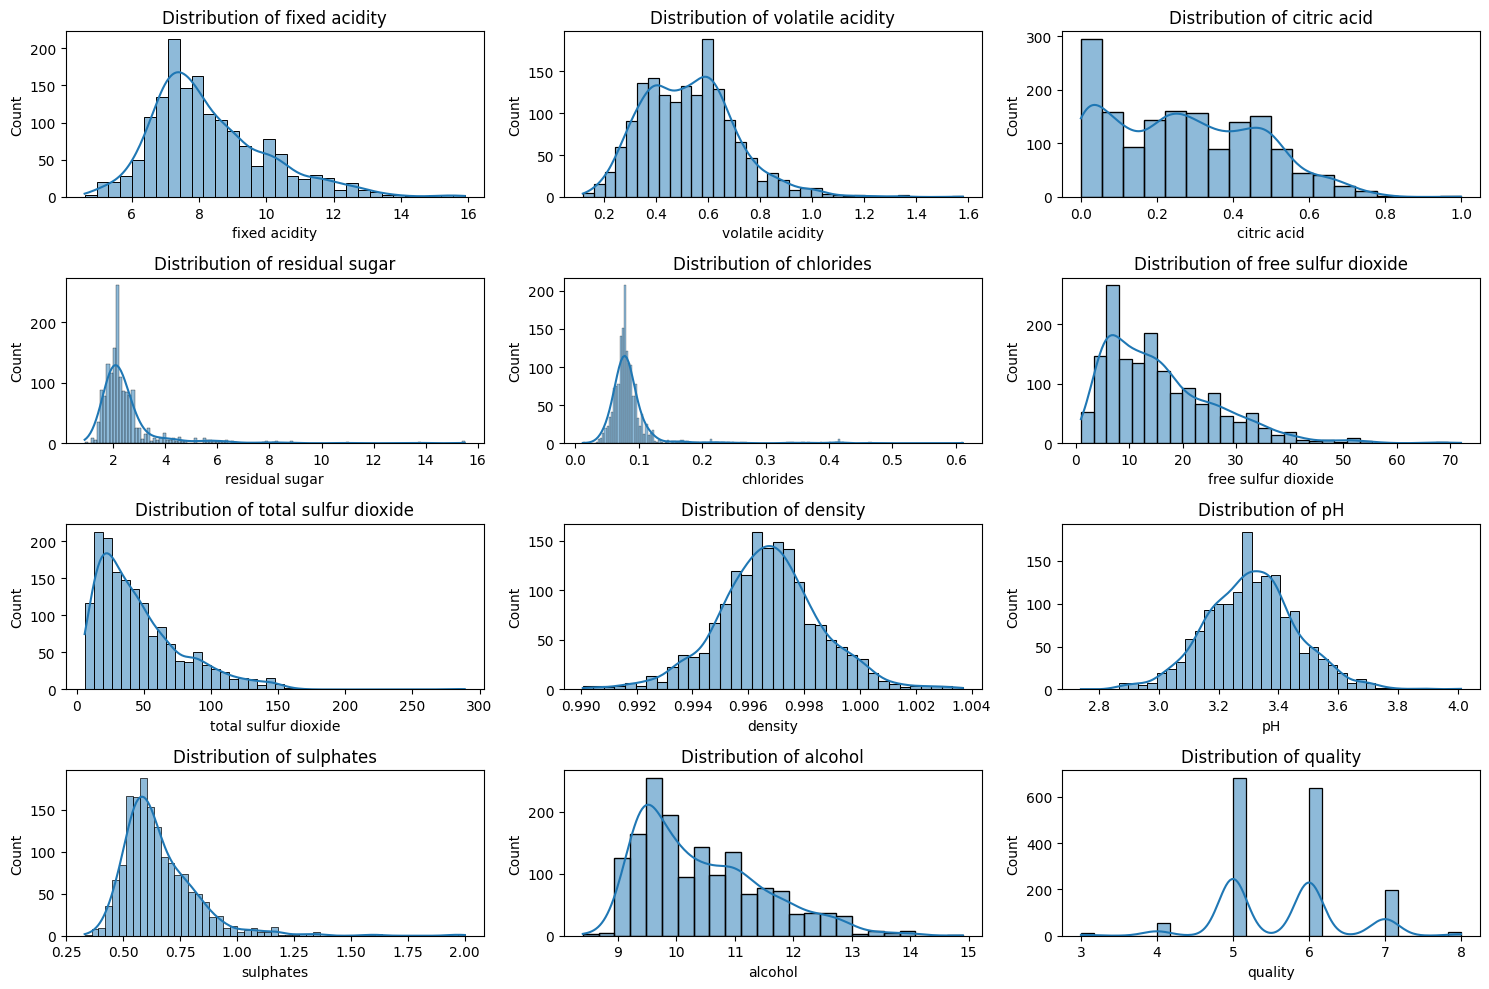

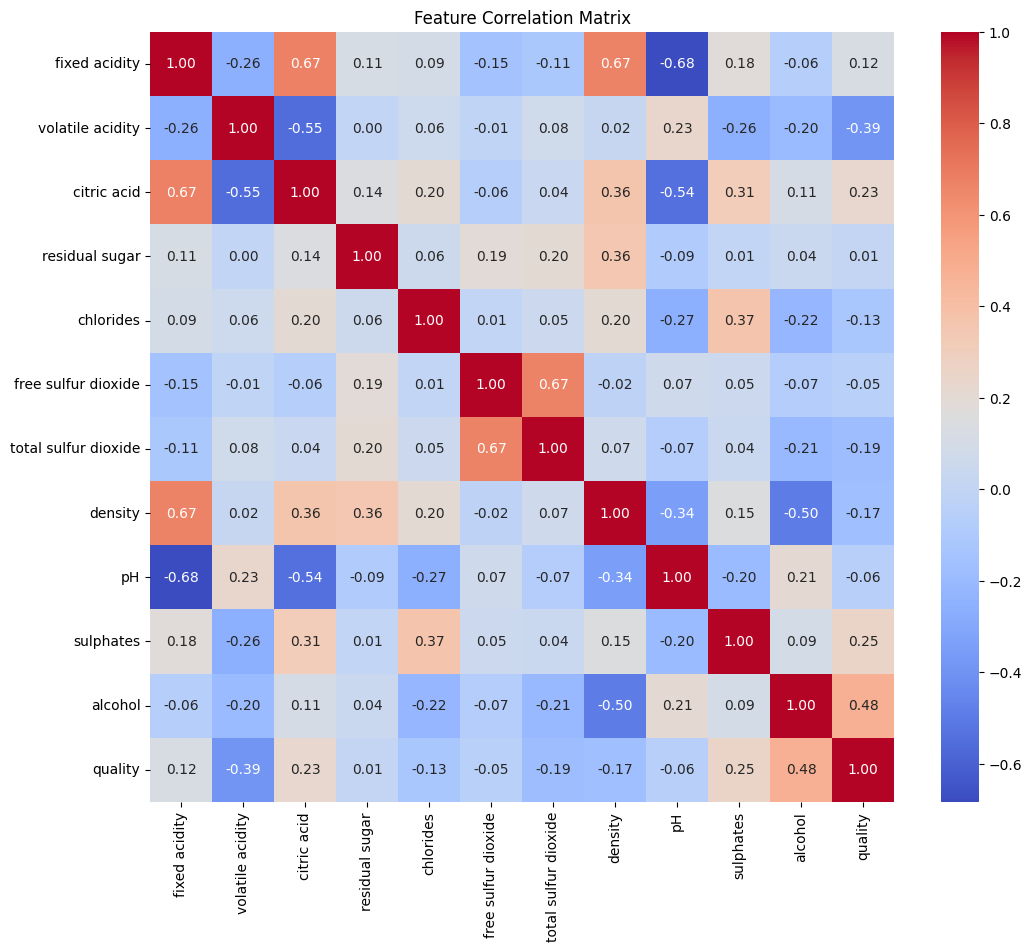

In [2]:
# Wine Quality Dataset: Clustering Analysis
# Comparative study of clustering algorithms with different preprocessing techniques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

print("Wine Quality Dataset Shape:", wine_data.shape)
print("\nFeatures in the dataset:")
print(wine_data.columns.tolist())
print("\nSample data:")
print(wine_data.head())

# Exploratory Data Analysis
print("\nStatistical Summary:")
print(wine_data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(wine_data.isnull().sum())

# Feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(wine_data.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(wine_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(12, 10))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Remove the target variable for clustering
X = wine_data.drop('quality', axis=1)

# Define preprocessing functions
def no_preprocessing(X):
    return X

def normalize_data(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

def transform_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

def apply_pca(X):
    pca = PCA(n_components=0.95)
    return pca.fit_transform(X)

def transform_and_normalize(X):
    scaler1 = StandardScaler()
    scaler2 = MinMaxScaler()
    X_scaled = scaler1.fit_transform(X)
    return scaler2.fit_transform(X_scaled)

def transform_normalize_pca(X):
    scaler1 = StandardScaler()
    scaler2 = MinMaxScaler()
    pca = PCA(n_components=0.95)
    X_scaled = scaler1.fit_transform(X)
    X_norm = scaler2.fit_transform(X_scaled)
    return pca.fit_transform(X_norm)

# Define preprocessing methods
preprocessing_methods = {
    'No Data Processing': no_preprocessing,
    'Using Normalization': normalize_data,
    'Using Transform': transform_data,
    'Using PCA': apply_pca,
    'Using T+N': transform_and_normalize,
    'T+N+PCA': transform_normalize_pca
}

# Define clustering methods
def apply_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    return labels

def apply_hierarchical(X, n_clusters):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    return labels

def apply_meanshift(X, n_clusters=None):
    meanshift = MeanShift(bandwidth=2)
    labels = meanshift.fit_predict(X)
    return labels

clustering_methods = {
    'K-Mean Clustering': apply_kmeans,
    'Hierarchical Clustering': apply_hierarchical,
    'K-mean Shift Clustering': apply_meanshift
}

# Define evaluation metrics
def evaluate_clustering(X, labels):
    if len(np.unique(labels)) <= 1:
        return 0, 0, 0
    try:
        silhouette = silhouette_score(X, labels)
    except:
        silhouette = 0
    try:
        calinski = calinski_harabasz_score(X, labels)
    except:
        calinski = 0
    try:
        davies = davies_bouldin_score(X, labels)
    except:
        davies = float('inf')
    return silhouette, calinski, davies

# Run experiments and collect results
results = {}

for clustering_name, clustering_func in clustering_methods.items():
    clustering_results = {}
    for preprocess_name, preprocess_func in preprocessing_methods.items():
        try:
            X_processed = preprocess_func(X)
            method_results = {'Silhouette': [], 'Calinski-Harabasz': [], 'Davies-Bouldin': []}
            for n_clusters in [3, 4, 5]:
                if clustering_name == 'K-mean Shift Clustering':
                    labels = clustering_func(X_processed)
                else:
                    labels = clustering_func(X_processed, n_clusters)
                n_actual_clusters = len(np.unique(labels))
                if n_actual_clusters > 1:
                    silhouette, calinski, davies = evaluate_clustering(X_processed, labels)
                    method_results['Silhouette'].append(round(silhouette, 2))
                    method_results['Calinski-Harabasz'].append(round(calinski))
                    method_results['Davies-Bouldin'].append(round(davies, 2))
                else:
                    method_results['Silhouette'].append('NA')
                    method_results['Calinski-Harabasz'].append('NA')
                    method_results['Davies-Bouldin'].append('NA')
            clustering_results[preprocess_name] = method_results
        except Exception as e:
            print(f"Error with {clustering_name} and {preprocess_name}: {e}")
            clustering_results[preprocess_name] = {
                'Silhouette': ['NA', 'NA', 'NA'],
                'Calinski-Harabasz': ['NA', 'NA', 'NA'],
                'Davies-Bouldin': ['NA', 'NA', 'NA']
            }
    results[clustering_name] = clustering_results
